In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

print(torch.__version__, torch.cuda.is_available())

1.10.2 False


train_x: torch.Size([100, 100, 1])
train_y: torch.Size([100, 1])
test_x: torch.Size([100, 100, 1])
test_y: torch.Size([100, 1])


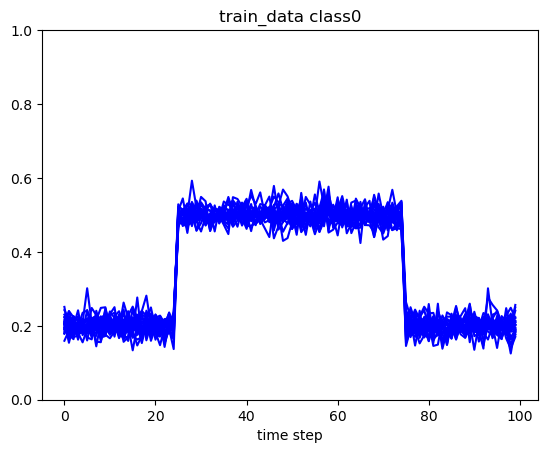

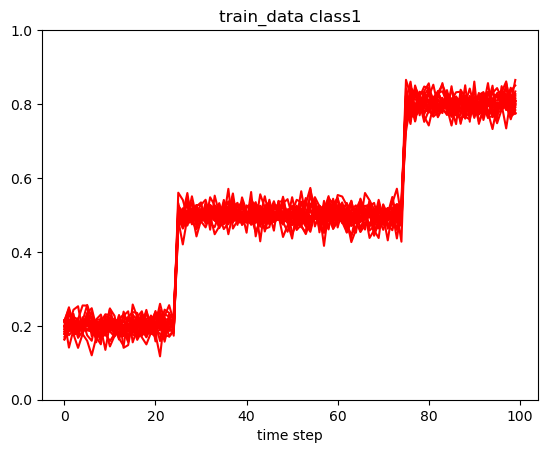

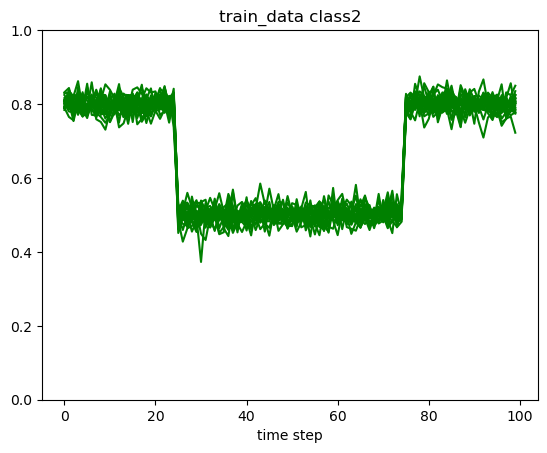

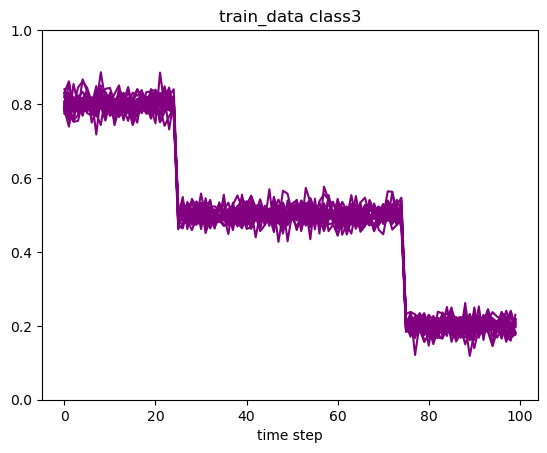

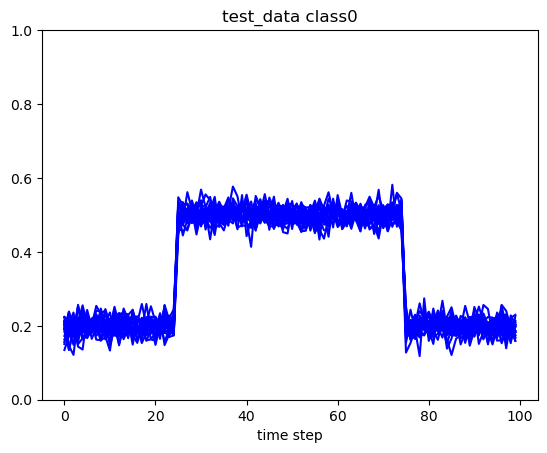

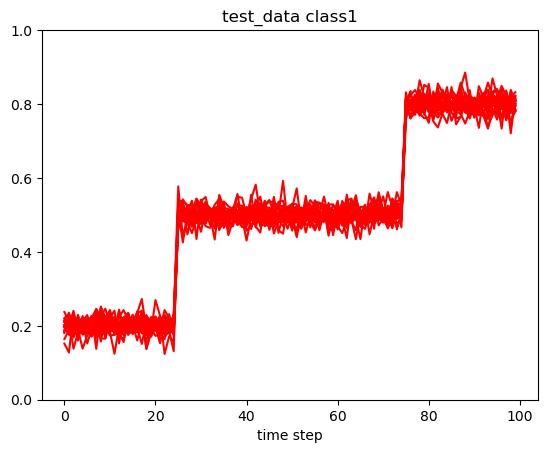

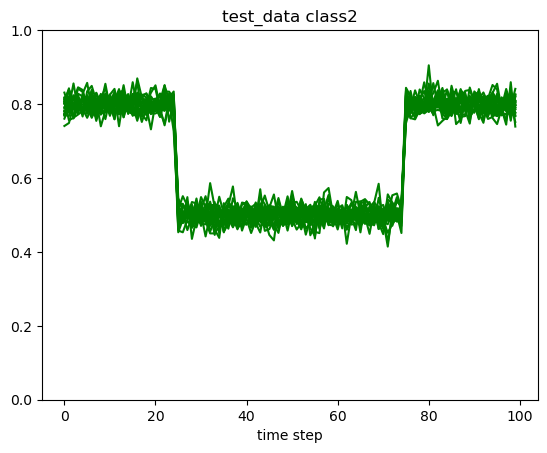

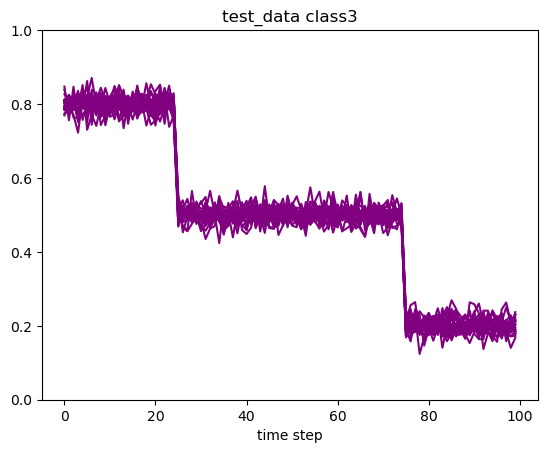

In [2]:
# makeState ----------------------------------------------------------------------------------------------------------- #

def makeState(state1_mean, state2_mean, state3_mean, state4_mean, state_length, n_data, dim):
    dataLength = state_length * 4
    data = np.zeros((n_data, dataLength, dim))
    for i in range(n_data):
        state = np.zeros((dataLength, dim))
        for j in range(dim):
            sd_low = 0.01
            sd_high = 0.03
            state_tmp = np.zeros((dataLength, 1))
            state1 = np.random.normal(loc=state1_mean, scale=np.random.uniform(low=sd_low, high=sd_high), size=state_length).astype(np.float32)
            state2 = np.random.normal(loc=state2_mean, scale=np.random.uniform(low=sd_low, high=sd_high), size=state_length).astype(np.float32)
            state3 = np.random.normal(loc=state3_mean, scale=np.random.uniform(low=sd_low, high=sd_high), size=state_length).astype(np.float32)
            state4 = np.random.normal(loc=state4_mean, scale=np.random.uniform(low=sd_low, high=sd_high), size=state_length).astype(np.float32)
            state_tmp = np.concatenate([state1, state2, state3, state4])
            state[:, j] = state_tmp.copy()
        data[i, :, :] = state.copy()
    return(data)

# ----------------------------------------------------------------------------------------------------------------------- #




# makeDataset ----------------------------------------------------------------------------------------------------------------- #

# many to many data
# def make_dataset(low_data, label, data_length):

#     data, target = [], []

#     for i in range(len(low_data)-data_length):
#         data.append(low_data[i:i + data_length])
#         target.append(label[i + data_length])

#     re_data = np.array(data).reshape(len(data), data_length, low_data.shape[1])
#     re_target = np.array(target).reshape(len(data), label.shape[1])

#     return re_data, re_target


# ---------------------------------------------------------------------------------------------------------------------- #





# train dataset -------------------------------------------------------------------------------------------------------- #
# parameter
dataLength = 100 # 系列長
n_state = 4 #状態数（固定）
state_length = int(dataLength / n_state) #1つのstateの長さ
n_data = 25 #1つのクラスのデータ数
dim = 1 #特徴量数
classNum = 4

# class0
state1_mean = 0.2 #state1の平均
state2_mean = 0.5 #state2の平均
state3_mean = 0.5 #state3の平均
state4_mean = 0.2 #state4の平均
x_0 = makeState(state1_mean, state2_mean, state3_mean, state4_mean, state_length, n_data, dim)
y_0 = np.full(n_data, 0, dtype = np.int64) # many to one
# y_0 = np.full(n_data*data_length, 0) # many to many 

# class1
state1_mean = 0.2 #state1の平均
state2_mean = 0.5 #state2の平均
state3_mean = 0.5 #state3の平均
state4_mean = 0.8 #state4の平均
x_1 = makeState(state1_mean, state2_mean, state3_mean, state4_mean, state_length, n_data, dim)
y_1 = np.full(n_data, 1, dtype = np.int64)
# y_1 = np.full(n_data*data_length, 1)

# class2
state1_mean = 0.8 #state1の平均
state2_mean = 0.5 #state2の平均
state3_mean = 0.5 #state3の平均
state4_mean = 0.8 #state4の平均
x_2 = makeState(state1_mean, state2_mean, state3_mean, state4_mean, state_length, n_data, dim)
y_2 = np.full(n_data, 2, dtype = np.int64)
# y_2 = np.full(n_data*data_length, 2)

# calss3
state1_mean = 0.8 #state1の平均
state2_mean = 0.5 #state2の平均
state3_mean = 0.5 #state3の平均
state4_mean = 0.2 #state4の平均
x_3 = makeState(state1_mean, state2_mean, state3_mean, state4_mean, state_length, n_data, dim)
y_3 = np.full(n_data, 3, dtype = np.int64)
# y_3 = np.full(n_data*data_length, 3)

# make train data
## x
series_length = dataLength * n_data * n_state
x = np.concatenate([x_0, x_1, x_2, x_3], axis = 0)#.reshape(series_length, n_feature)
## y
y = np.concatenate([y_0, y_1, y_2, y_3], axis = 0).reshape(-1, 1)
# train_x, train_y = make_dataset(x, y, data_length)

# plot
color_list = ["blue", "red", "green", "purple"]
idx = 0
for j in range(0, classNum):
    plt.figure()
    for i in range(0, n_data):
        plt.ylim(0.0, 1.0)
        plt.plot(x[idx + i], color = color_list[j] )
    idx += n_data
    plt.title("train_data class{}".format(j))
    plt.xlabel("time step")
    plt.savefig("data3/train_data_class{}.png".format(j))



## shuffle
np.random.seed(1234)
idx = np.arange(x.shape[0])
np.random.shuffle(idx)
train_x = x[idx, :, :].copy()
train_y = y[idx, :].copy()

# ------------------------------------------------------------------------------------------------------------- #

# test dataset -------------------------------------------------------------------------------------------------------- #
# parameter
# data_length = 20 # 系列長
# n_state = 4 #状態数（固定）
# state_length = int(data_length / n_state) #1つのstateの長さ
# n_data = 5 #1つのクラスのデータ数
# n_feature = 1 #特徴量数

# class0
state1_mean = 0.2 #state1の平均
state2_mean = 0.5 #state2の平均
state3_mean = 0.5 #state3の平均
state4_mean = 0.2 #state4の平均
x_0 = makeState(state1_mean, state2_mean, state3_mean, state4_mean, state_length, n_data, dim)
y_0 = np.full(n_data, 0, dtype = np.int64) # many to one
# y_0 = np.full(n_data*data_length, 0) # many to many 

# class1
state1_mean = 0.2 #state1の平均
state2_mean = 0.5 #state2の平均
state3_mean = 0.5 #state3の平均
state4_mean = 0.8 #state4の平均
x_1 = makeState(state1_mean, state2_mean, state3_mean, state4_mean, state_length, n_data, dim)
y_1 = np.full(n_data, 1, dtype = np.int64)
# y_1 = np.full(n_data*data_length, 1)

# class2
state1_mean = 0.8 #state1の平均
state2_mean = 0.5 #state2の平均
state3_mean = 0.5 #state3の平均
state4_mean = 0.8 #state4の平均
x_2 = makeState(state1_mean, state2_mean, state3_mean, state4_mean, state_length, n_data, dim)
y_2 = np.full(n_data, 2, dtype = np.int64)
# y_2 = np.full(n_data*data_length, 2)

# calss3
state1_mean = 0.8 #state1の平均
state2_mean = 0.5 #state2の平均
state3_mean = 0.5 #state3の平均
state4_mean = 0.2 #state4の平均
x_3 = makeState(state1_mean, state2_mean, state3_mean, state4_mean, state_length, n_data, dim)
y_3 = np.full(n_data, 3, dtype = np.int64)
# y_3 = np.full(n_data*data_length, 3)

# make test data
## x
series_length = dataLength * n_data * n_state
x = np.concatenate([x_0, x_1, x_2, x_3], axis = 0)#.reshape(series_length, n_feature)
## y
y = np.concatenate([y_0, y_1, y_2, y_3], axis = 0).reshape(-1, 1)
# test_x, test_y = make_dataset(x, y, data_length)

# plot
idx = 0
for j in range(0, classNum):
    plt.figure()
    for i in range(0, n_data):
        plt.ylim(0.0, 1.0)
        plt.plot(x[idx + i], color = color_list[j] )
    idx += n_data
    plt.title("test_data class{}".format(j))
    plt.xlabel("time step")
    plt.savefig("data3/test_data_class{}.png".format(j))

## shuffle
np.random.seed(12345)
idx = np.arange(x.shape[0])
np.random.shuffle(idx)
test_x = x[idx, :, :].copy()
test_y = y[idx, :].copy()


# ------------------------------------------------------------------------------------------------------------- #


# transform to tensor ----------------------------------------------------------------------------------- #

train_x = torch.tensor(train_x, requires_grad=True, dtype = torch.float32)

train_y = torch.tensor(train_y, dtype = torch.long)

test_x = torch.tensor(test_x, requires_grad=True, dtype = torch.float32)

test_y = torch.tensor(test_y, dtype = torch.long)

# confirm
print("train_x:", train_x.shape)
print("train_y:", train_y.shape)
print("test_x:", test_x.shape)
print("test_y:", test_y.shape)
# ------------------------------------------------------------------------------------------------------------- #

In [3]:
class R_LLGMN_Pytorch(nn.Module):
    def __init__(self, dim, classNum, stateNum, componentNum, dataLength):
        #　変数
        self.dim = dim
        self.classNum = classNum                        # クラス数
        self.stateNum = stateNum                        # 状態数
        self.componentNum = componentNum                # コンポーネント数
        self.dataLength = dataLength                             # 時系列長
        self.logSize = int(1 + dim * (dim + 3) / 2)     # 非線形変換後のベクトル数
        # 各層の初期化
        self.in1 = torch.ones((self.dataLength, self.logSize), dtype = torch.float32)
        self.out1 = torch.zeros((self.dataLength, self.logSize), dtype = torch.float32)
        self.in2 = torch.zeros((self.dataLength, self.classNum, self.stateNum, self.stateNum, self.componentNum), dtype = torch.float32)
        self.out2 = torch.zeros((self.dataLength, self.classNum, self.stateNum, self.stateNum, self.componentNum), dtype = torch.float32)
        self.in3 = torch.zeros((self.dataLength, self.classNum, self.stateNum, self.stateNum), dtype = torch.float32)
        self.out3 = torch.zeros((self.dataLength, self.classNum, self.stateNum, self.stateNum), dtype = torch.float32)
        self.in4 = torch.zeros((self.dataLength, self.classNum, self.stateNum), dtype = torch.float32)
        self.out4 = torch.zeros((self.dataLength, self.classNum, self.stateNum), dtype = torch.float32)
        self.in5 = torch.zeros((self.dataLength, self.classNum), dtype = torch.float32)
        self.out5 = torch.zeros((self.dataLength, self.classNum), dtype = torch.float32)
        
        super(R_LLGMN_Pytorch, self).__init__()
        # パラメータ
        self.weight = nn.Parameter(torch.ones((self.classNum, self.stateNum, self.stateNum, self.componentNum, self.logSize), dtype = torch.float32))
      

    # 順方向
    def forward(self, X):
        rho = 1e-5
        
        for t in range(self.dataLength):
            
            # ----第1層----
            x = X[t].reshape(dim, 1)
            a = x @ x.T
            
            # 1次の項
            for i in range(self.dim):
                self.in1[t][i+1] = X[t][i]
            # 2次の項
            for i in range(self.logSize - self.dim - 1):
                self.in1[t][i+self.dim+1] = a[np.triu_indices(self.dim)][i]
            self.out1[t] = self.in1[t]
            # ----第1層----
            
            for c in range(self.classNum):
                for k1 in range(self.stateNum):
                    for k in range(self.stateNum):
                        for m in range(self.componentNum):
                            # ----第2層----
                            self.in2[t][c][k1][k][m] = torch.sum(self.weight[c][k1][k][m].clone() * self.out1[t].clone())
                            self.out2[t][c][k1][k][m] = torch.exp(self.in2[t][c][k1][k][m].clone())
                            # ----第2層----

                        # ----第3層----
                        self.in3[t][c][k1][k] = torch.sum(self.out2[t][c][k1][k].clone())
                        if t == 0:
                            self.out3[t] = self.in3[t].clone()
                        else:
                            self.out3[t][c][k1][k] = self.out4[t-1][c][k1].clone() * self.in3[t][c][k1][k].clone()
                        # ----第3層----
                    
                    # ----第4層----
                    self.in4[t][c][k1] = torch.sum(self.out3[t][c][k1].clone())
                    
            F_NN = torch.sum(self.in4[t].clone())
            
            if F_NN != 0:
                self.out4[t] = self.in4[t].clone() / F_NN
            else: # エラー回避
                self.out4[t] = self.in4[t].clone() / rho
            # ----第4層----
            
            # ----第5層----
            for c in range(self.classNum):
                self.in5[t][c] = torch.sum(self.out4[t][c].clone())
            
            self.in5[t] = torch.sum(self.out4[t].clone(), axis=1)
            
            self.out5[t] = self.in5[t].clone()
            # ----第5層----
            y = self.out5[t].clone()
            return y


dim = dim
classNum = 4
stateNum = 2
componentNum = 2
dataLength = dataLength

model = R_LLGMN_Pytorch(dim, classNum, stateNum, componentNum, dataLength)
print(model)

R_LLGMN_Pytorch()


epoch: 1 	 loss: 1.3253778207302094
epoch: 2 	 loss: 1.2498587608337401
epoch: 3 	 loss: 1.2384234708547592
epoch: 4 	 loss: 1.2335013943910598
epoch: 5 	 loss: 1.2299764168262481
epoch: 6 	 loss: 1.2277536672353744
epoch: 7 	 loss: 1.226369332075119
epoch: 8 	 loss: 1.2254621607065201
epoch: 9 	 loss: 1.224822723865509
epoch: 10 	 loss: 1.22434912443161
done.


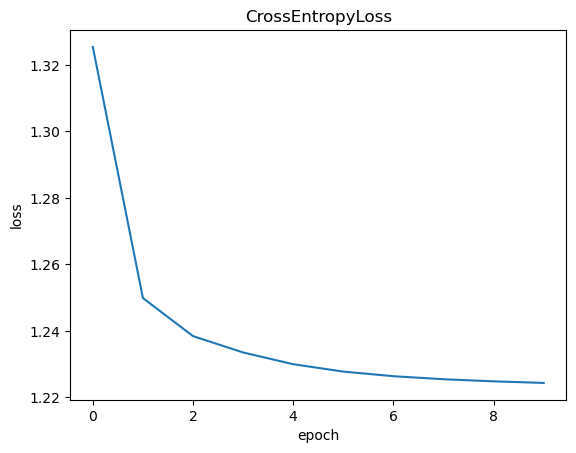

In [4]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

loss_record = []
epochs = 10

torch.autograd.set_detect_anomaly(True)
for epoch in range(1, epochs + 1):
    model.train()
    running_loss = 0.0
    for j, (X, label) in enumerate(zip(train_x, train_y)):
        y = model(X).view(-1, classNum)
        loss = loss_function(y, label)
        # print("time:{}, loss:{}".format(j, loss))
        running_loss += loss.item()
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
    running_loss /= j+1
    loss_record.append(running_loss)
    print("epoch:", epoch, "\t", "loss:", running_loss)
print("done.")

plt.figure()
plt.plot(loss_record)
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("CrossEntropyLoss")
plt.savefig("data3/loss.png")

In [5]:
import warnings
warnings.simplefilter('ignore')

predict_list = np.ones(len(test_y))
answer_list = np.ones(len(test_y))
predict_df = pd.DataFrame(columns=["answer", "predict", "exact"])
model.eval()
with torch.no_grad():
    for j, (X, label) in enumerate(zip(test_x, test_y)):
        y = model(X)
        predict = torch.argmax(y).to("cpu")
        predict = np.array(predict)
        predict_list[j] = predict 
        answer = np.array(label.item())
        answer_list[j] = answer
        exact = "O" if predict.item() == answer.item() else "X"
        s = pd.Series([answer, predict, exact], index=predict_df.columns)
        predict_df = predict_df.append(s, ignore_index=True)

print(predict_df.value_counts("exact"))
print(predict_df)

exact
O    50
X    50
dtype: int64
   answer predict exact
0       2       3     X
1       1       1     O
2       3       3     O
3       2       3     X
4       0       1     X
..    ...     ...   ...
95      1       1     O
96      1       1     O
97      0       1     X
98      1       1     O
99      3       3     O

[100 rows x 3 columns]


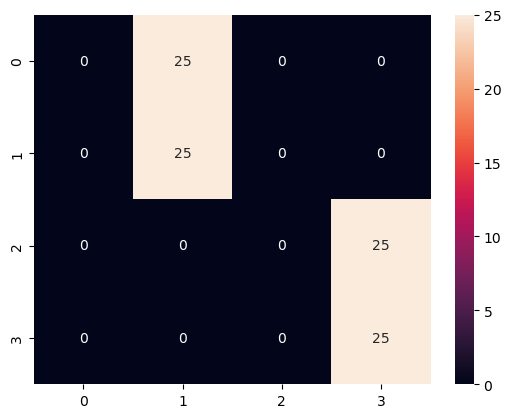

In [6]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

report = classification_report(answer_list, predict_list,output_dict= True)
pd_report = pd.DataFrame(report).transpose()
pd_report.to_csv("data3/report.csv")

matrix = confusion_matrix(answer_list, predict_list)
sns.heatmap(matrix, annot=True)
plt.savefig("data3/confusion_matrix.png")

In [7]:
# # label_0
# TP0 = 0
# FN0 = 0
# FP0 = 0
# TN0 = 0
# for ans, pred in zip(predict_df["answer"], predict_df["predict"]):
#     if (ans == 0 and pred == 0):
#         TP0 += 1
#     elif (ans == 0 and pred != 0):
#         FN0 += 1
#     elif (ans != 1 and pred == 0):
#         FP0 += 1
#     elif (ans != 0 and pred != 0):
#         TN0 += 1

        
# label_0 = 0     
# all_0 = (predict_df["answer"] == 0).sum()

# acc_0 = (TP0+TN0) / (TP0+TN0+FP0+FN0)

# recall_0 = TP0 / (TP0+FN0)

# pre_0 = TP0 / (TP0+FP0)

# F_0 = (2*recall_0*pre_0) / (recall_0+pre_0)

# score_0 = np.array([label_0, all_0, acc_0, recall_0, pre_0, F_0])
# print(score_0)



# # label_1
# TP1 = 0
# FN1 = 0
# FP1 = 0
# TN1 = 0
# for ans, pred in zip(predict_df["answer"], predict_df["predict"]):
#     if (ans == 1 and pred == 1):
#         TP1 += 1
#     elif (ans == 1 and pred != 1):
#         FN1 += 1
#     elif (ans != 1 and pred == 1):
#         FP1 += 1
#     elif (ans != 1 and pred != 1):
#         TN1 += 1

        
# label_1 = 1    
# all_1 = (predict_df["answer"] == 1).sum()

# acc_1 = (TP1+TN1) / (TP1+TN1+FP1+FN1)

# recall_1 = TP1 / (TP1+FN1)

# pre_1 = TP1 / (TP1+FP1)

# F_1 = (2*recall_1*pre_1) / (recall_1+pre_1)

# score_1 = np.array([label_1, all_1, acc_1, recall_1, pre_1, F_1])
# print(score_1)



# # # label_2
# TP2 = 0
# FN2 = 0
# FP2 = 0
# TN2 = 0
# for ans, pred in zip(predict_df["answer"], predict_df["predict"]):
#     if (ans == 2 and pred == 2):
#         TP2 += 1
#     elif (ans == 2 and pred != 2):
#         FN2 += 1
#     elif (ans != 2 and pred == 2):
#         FP2 += 1
#     elif (ans != 2 and pred != 2):
#         TN2 += 1

        
# label_2 = 2     
# all_2 = (predict_df["answer"] == 2).sum()

# acc_2 = (TP2+TN2) / (TP2+TN2+FP2+FN2)

# recall_2 = TP2 / (TP2+FN2)

# pre_2 = TP2 / (TP2+FP2)

# F_2 = (2*recall_2*pre_2) / (recall_2+pre_2)

# score_2 = np.array([label_2, all_2, acc_2, recall_2, pre_2, F_2])
# print(score_2)


# # # label_3
# TP3 = 0
# FN3 = 0
# FP3 = 0
# TN3 = 0
# for ans, pred in zip(predict_df["answer"], predict_df["predict"]):
#     if (ans == 3 and pred == 3):
#         TP3 += 1
#     elif (ans == 3 and pred != 3):
#         FN3 += 1
#     elif (ans != 3 and pred == 3):
#         FP3 += 1
#     elif (ans != 3 and pred != 3):
#         TN3 += 1

        
# label_3 = 3    
# all_3 = (predict_df["answer"] == 3).sum()

# acc_3 = (TP3+TN3) / (TP3+TN3+FP3+FN3)

# recall_3 = TP3 / (TP3+FN3)

# pre_3 = TP3 / (TP3+FP3)

# F_3 = (2*recall_3*pre_3) / (recall_3+pre_3)

# score_3 = np.array([label_3, all_3, acc_3, recall_3, pre_3, F_3])
# print(score_3)

# score_df = pd.DataFrame(np.vstack((score_0, score_1)),
#                        columns=["label", "all", "accuracy", "recall", "precision", "F-Score"])
# print(score_df)